In [1]:
# close gpu,it seems that in the algorithm is cpu=intensive in this task, using a gpu can add 
# additional computational burden as transferring data to gpu can be slow.
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"   

# Import dependencies

In [2]:
# Reload modules whenever underlying code changes
%load_ext autoreload
%autoreload 2

In [2]:
# pdb will automatically run on exceptions
#%pdb on # currently not working due to https://github.com/ipython/ipykernel/issues/422

In [3]:
# import os

# # Only occupy one GPU, as in https://stackoverflow.com/questions/37893755/tensorflow-set-cuda-visible-devices-within-jupyter
# os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
# os.environ["CUDA_VISIBLE_DEVICES"]="0"

# # Only allocate GPU memory as needed
# os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

# # Suppress tf warning messages
# os.environ["TF_CPP_MIN_LOG_LEVEL"]="3"

In [3]:
%matplotlib inline
from sgm.dependencies import *

# Initialize untrained agent

In [3]:
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True
# tf.enable_eager_execution(config=config)

In [35]:
#tf.debugging.set_log_device_placement(True)
tf.test.is_gpu_available()

False

In [60]:
tf.reset_default_graph()

In [62]:
from sgm.envs import env_load_fn
from sgm.agent import UvfAgent

# If you change the environment parameters below, make sure to run
# tf.reset_default_graph() in the cell above before training.
max_episode_steps = 20
env_name = 'FourRooms'  # Choose one of the environments shown above. 
resize_factor = 4  # Inflate the environment to increase the difficulty.
thin = True # If True, resize by expanding open space, not walls, to make walls thin
desc_name = "thinned_" + env_name.lower() if thin else env_name.lower()

base_dir = os.path.join(os.getcwd(), os.pardir, "agents")
model_dir = os.path.join(base_dir, desc_name)

tf_env = env_load_fn(env_name, max_episode_steps,
                     resize_factor=resize_factor,
                     terminate_on_timeout=False,
                     thin=thin)
eval_tf_env = env_load_fn(env_name, max_episode_steps,
                          resize_factor=resize_factor,
                          terminate_on_timeout=True,
                          thin=thin)

agent = UvfAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    max_episode_steps=max_episode_steps,
    use_distributional_rl=True,
    ensemble_size=3)

# Train the agent

In [63]:
from sgm.trainer import train_eval

train_eval(agent,
          tf_env,
          eval_tf_env,
          initial_collect_steps=1000,
          eval_interval=1000,
          num_eval_episodes=10,
          num_iterations=30000,
          save_model_dir=model_dir,
          experiment_name=f"{env_name}_coordinate_{max_episode_steps}steps")

INFO:tensorflow:random_seed = 0
INFO:tensorflow:Saving checkpoints to directory C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt
INFO:tensorflow:Creating tensorboard summary writer with directory C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM


  3%|▎         | 997/30000 [00:10<03:45, 128.57it/s]

Saved checkpoint for step 1000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-1
INFO:tensorflow:step = 1000, loss = 2.504621
INFO:tensorflow:102.229 steps/sec
INFO:tensorflow:step = 1000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.30
INFO:tensorflow:		 predicted_dist = 13.7 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 14.7 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 15.5 (0.4)
INFO:tensorflow:	 eval_time = 1.32


  7%|▋         | 1997/30000 [00:19<03:32, 131.57it/s]

Saved checkpoint for step 2000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-2
INFO:tensorflow:step = 2000, loss = 1.234311
INFO:tensorflow:142.393 steps/sec
INFO:tensorflow:step = 2000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.90
INFO:tensorflow:		 predicted_dist = 17.2 (0.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 17.7 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.3 (0.4)
INFO:tensorflow:	 eval_time = 1.23


 10%|▉         | 2997/30000 [00:28<03:28, 129.62it/s]

Saved checkpoint for step 3000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-3
INFO:tensorflow:step = 3000, loss = 1.420480
INFO:tensorflow:143.103 steps/sec
INFO:tensorflow:step = 3000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -18.30
INFO:tensorflow:		 predicted_dist = 15.7 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 16.6 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.1 (0.5)
INFO:tensorflow:	 eval_time = 1.27


 13%|█▎        | 3986/30000 [00:36<03:15, 133.31it/s]

Saved checkpoint for step 4000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-4
INFO:tensorflow:step = 4000, loss = 0.818841
INFO:tensorflow:142.744 steps/sec
INFO:tensorflow:step = 4000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -17.00
INFO:tensorflow:		 predicted_dist = 16.7 (1.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.2 (0.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 19.0 (0.3)
INFO:tensorflow:	 eval_time = 1.24


 17%|█▋        | 4992/30000 [00:45<03:14, 128.47it/s]

Saved checkpoint for step 5000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-5
INFO:tensorflow:step = 5000, loss = 0.647286
INFO:tensorflow:143.067 steps/sec
INFO:tensorflow:step = 5000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -17.00
INFO:tensorflow:		 predicted_dist = 17.3 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -16.90
INFO:tensorflow:		 predicted_dist = 18.8 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 19.3 (0.2)
INFO:tensorflow:	 eval_time = 1.20


 20%|█▉        | 5995/30000 [00:54<03:02, 131.37it/s]

Saved checkpoint for step 6000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-6
INFO:tensorflow:step = 6000, loss = 0.990880
INFO:tensorflow:144.566 steps/sec
INFO:tensorflow:step = 6000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -18.10
INFO:tensorflow:		 predicted_dist = 17.3 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -18.60
INFO:tensorflow:		 predicted_dist = 18.4 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.6 (0.6)
INFO:tensorflow:	 eval_time = 1.29


 23%|██▎       | 6998/30000 [01:03<02:54, 131.79it/s]

Saved checkpoint for step 7000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-7
INFO:tensorflow:step = 7000, loss = 1.032778
INFO:tensorflow:147.598 steps/sec
INFO:tensorflow:step = 7000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -16.70
INFO:tensorflow:		 predicted_dist = 16.8 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -17.40
INFO:tensorflow:		 predicted_dist = 17.9 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -20.00
INFO:tensorflow:		 predicted_dist = 18.8 (0.3)
INFO:tensorflow:	 eval_time = 1.20


 27%|██▋       | 7988/30000 [01:11<02:47, 131.05it/s]

Saved checkpoint for step 8000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-8
INFO:tensorflow:step = 8000, loss = 1.230367
INFO:tensorflow:143.953 steps/sec
INFO:tensorflow:step = 8000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -9.70
INFO:tensorflow:		 predicted_dist = 15.2 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -14.70
INFO:tensorflow:		 predicted_dist = 17.5 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.60
INFO:tensorflow:		 predicted_dist = 18.5 (0.4)
INFO:tensorflow:	 eval_time = 1.09


 30%|██▉       | 8988/30000 [01:20<02:44, 127.43it/s]

Saved checkpoint for step 9000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-9
INFO:tensorflow:step = 9000, loss = 1.989857
INFO:tensorflow:143.343 steps/sec
INFO:tensorflow:step = 9000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -10.10
INFO:tensorflow:		 predicted_dist = 13.6 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.50
INFO:tensorflow:		 predicted_dist = 15.3 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.20
INFO:tensorflow:		 predicted_dist = 17.5 (0.9)
INFO:tensorflow:	 eval_time = 1.07


 33%|███▎      | 9992/30000 [01:29<02:36, 128.10it/s]

Saved checkpoint for step 10000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-10
INFO:tensorflow:step = 10000, loss = 2.206866
INFO:tensorflow:143.313 steps/sec
INFO:tensorflow:step = 10000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -5.50
INFO:tensorflow:		 predicted_dist = 11.9 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.50
INFO:tensorflow:		 predicted_dist = 14.1 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -18.70
INFO:tensorflow:		 predicted_dist = 16.2 (0.9)
INFO:tensorflow:	 eval_time = 1.03


 37%|███▋      | 10996/30000 [01:37<02:23, 132.13it/s]

Saved checkpoint for step 11000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-11
INFO:tensorflow:step = 11000, loss = 2.498052
INFO:tensorflow:144.455 steps/sec
INFO:tensorflow:step = 11000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -6.00
INFO:tensorflow:		 predicted_dist = 9.2 (2.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.30
INFO:tensorflow:		 predicted_dist = 12.8 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.40
INFO:tensorflow:		 predicted_dist = 15.5 (0.6)
INFO:tensorflow:	 eval_time = 1.02


 40%|███▉      | 11999/30000 [01:46<02:43, 109.92it/s]

Saved checkpoint for step 12000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-12
INFO:tensorflow:step = 12000, loss = 2.566586
INFO:tensorflow:139.839 steps/sec
INFO:tensorflow:step = 12000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.70
INFO:tensorflow:		 predicted_dist = 7.0 (2.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -11.20
INFO:tensorflow:		 predicted_dist = 11.4 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.50
INFO:tensorflow:		 predicted_dist = 14.9 (1.0)
INFO:tensorflow:	 eval_time = 1.02


 43%|████▎     | 12990/30000 [01:55<02:10, 130.47it/s]

Saved checkpoint for step 13000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-13
INFO:tensorflow:step = 13000, loss = 2.928895
INFO:tensorflow:142.610 steps/sec
INFO:tensorflow:step = 13000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -6.10
INFO:tensorflow:		 predicted_dist = 6.3 (2.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 11.0 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.20
INFO:tensorflow:		 predicted_dist = 13.0 (0.5)
INFO:tensorflow:	 eval_time = 0.92


 47%|████▋     | 13998/30000 [02:03<02:01, 131.60it/s]

Saved checkpoint for step 14000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-14
INFO:tensorflow:step = 14000, loss = 2.785854
INFO:tensorflow:140.007 steps/sec
INFO:tensorflow:step = 14000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.60
INFO:tensorflow:		 predicted_dist = 6.8 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.00
INFO:tensorflow:		 predicted_dist = 10.5 (0.7)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.00
INFO:tensorflow:		 predicted_dist = 12.7 (1.5)
INFO:tensorflow:	 eval_time = 0.97


 50%|████▉     | 14999/30000 [02:12<02:15, 110.50it/s]

Saved checkpoint for step 15000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-15
INFO:tensorflow:step = 15000, loss = 2.993420
INFO:tensorflow:142.797 steps/sec
INFO:tensorflow:step = 15000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -2.70
INFO:tensorflow:		 predicted_dist = 6.8 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 9.5 (1.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.50
INFO:tensorflow:		 predicted_dist = 12.4 (0.9)
INFO:tensorflow:	 eval_time = 0.95


 53%|█████▎    | 15988/30000 [02:20<01:43, 135.29it/s]

Saved checkpoint for step 16000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-16
INFO:tensorflow:step = 16000, loss = 2.630732
INFO:tensorflow:143.871 steps/sec
INFO:tensorflow:step = 16000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.80
INFO:tensorflow:		 predicted_dist = 6.5 (2.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.80
INFO:tensorflow:		 predicted_dist = 10.1 (1.2)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.10
INFO:tensorflow:		 predicted_dist = 12.6 (0.5)
INFO:tensorflow:	 eval_time = 0.98


 57%|█████▋    | 16998/30000 [02:29<01:38, 132.56it/s]

Saved checkpoint for step 17000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-17
INFO:tensorflow:step = 17000, loss = 3.404196
INFO:tensorflow:147.574 steps/sec
INFO:tensorflow:step = 17000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.90
INFO:tensorflow:		 predicted_dist = 6.9 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.60
INFO:tensorflow:		 predicted_dist = 10.3 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.00
INFO:tensorflow:		 predicted_dist = 13.5 (0.5)
INFO:tensorflow:	 eval_time = 1.00


 60%|█████▉    | 17992/30000 [02:37<01:30, 132.48it/s]

Saved checkpoint for step 18000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-18
INFO:tensorflow:step = 18000, loss = 3.055040
INFO:tensorflow:142.297 steps/sec
INFO:tensorflow:step = 18000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.70
INFO:tensorflow:		 predicted_dist = 5.3 (2.0)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.40
INFO:tensorflow:		 predicted_dist = 9.7 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.50
INFO:tensorflow:		 predicted_dist = 11.5 (0.7)
INFO:tensorflow:	 eval_time = 0.98


 63%|██████▎   | 18998/30000 [02:46<01:20, 137.08it/s]

Saved checkpoint for step 19000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-19
INFO:tensorflow:step = 19000, loss = 3.513460
INFO:tensorflow:146.551 steps/sec
INFO:tensorflow:step = 19000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.30
INFO:tensorflow:		 predicted_dist = 5.2 (1.2)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.70
INFO:tensorflow:		 predicted_dist = 8.4 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.60
INFO:tensorflow:		 predicted_dist = 11.0 (2.0)
INFO:tensorflow:	 eval_time = 0.97


 67%|██████▋   | 19990/30000 [02:54<01:13, 136.82it/s]

Saved checkpoint for step 20000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-20
INFO:tensorflow:step = 20000, loss = 3.061810
INFO:tensorflow:144.543 steps/sec
INFO:tensorflow:step = 20000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 5.0 (1.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.40
INFO:tensorflow:		 predicted_dist = 8.3 (0.8)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.40
INFO:tensorflow:		 predicted_dist = 11.5 (0.7)
INFO:tensorflow:	 eval_time = 1.00


 70%|██████▉   | 20996/30000 [03:02<01:06, 135.76it/s]

Saved checkpoint for step 21000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-21
INFO:tensorflow:step = 21000, loss = 2.759450
INFO:tensorflow:147.296 steps/sec
INFO:tensorflow:step = 21000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 6.1 (1.4)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.60
INFO:tensorflow:		 predicted_dist = 9.6 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.80
INFO:tensorflow:		 predicted_dist = 12.1 (0.6)
INFO:tensorflow:	 eval_time = 1.00


 73%|███████▎  | 21994/30000 [03:11<00:59, 135.42it/s]

Saved checkpoint for step 22000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-22
INFO:tensorflow:step = 22000, loss = 3.350547
INFO:tensorflow:146.984 steps/sec
INFO:tensorflow:step = 22000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.30
INFO:tensorflow:		 predicted_dist = 6.3 (1.7)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.40
INFO:tensorflow:		 predicted_dist = 10.0 (1.1)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.90
INFO:tensorflow:		 predicted_dist = 12.1 (1.0)
INFO:tensorflow:	 eval_time = 0.98


 77%|███████▋  | 22997/30000 [03:19<00:50, 137.89it/s]

Saved checkpoint for step 23000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-23
INFO:tensorflow:step = 23000, loss = 2.690050
INFO:tensorflow:147.718 steps/sec
INFO:tensorflow:step = 23000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 4.7 (1.5)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.50
INFO:tensorflow:		 predicted_dist = 8.4 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.00
INFO:tensorflow:		 predicted_dist = 12.4 (1.0)
INFO:tensorflow:	 eval_time = 0.97


 80%|███████▉  | 23998/30000 [03:27<00:43, 139.02it/s]

Saved checkpoint for step 24000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-24
INFO:tensorflow:step = 24000, loss = 3.285139
INFO:tensorflow:146.619 steps/sec
INFO:tensorflow:step = 24000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 5.1 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.80
INFO:tensorflow:		 predicted_dist = 8.9 (1.6)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.30
INFO:tensorflow:		 predicted_dist = 12.1 (1.6)
INFO:tensorflow:	 eval_time = 1.01


 83%|████████▎ | 24995/30000 [03:36<00:36, 137.75it/s]

Saved checkpoint for step 25000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-25
INFO:tensorflow:step = 25000, loss = 3.941688
INFO:tensorflow:147.301 steps/sec
INFO:tensorflow:step = 25000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.50
INFO:tensorflow:		 predicted_dist = 5.0 (1.3)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -10.00
INFO:tensorflow:		 predicted_dist = 8.9 (1.0)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -14.70
INFO:tensorflow:		 predicted_dist = 13.2 (2.1)
INFO:tensorflow:	 eval_time = 0.97


 87%|████████▋ | 25987/30000 [03:44<00:29, 137.31it/s]

Saved checkpoint for step 26000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-26
INFO:tensorflow:step = 26000, loss = 3.051204
INFO:tensorflow:150.969 steps/sec
INFO:tensorflow:step = 26000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.40
INFO:tensorflow:		 predicted_dist = 6.1 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -7.70
INFO:tensorflow:		 predicted_dist = 9.3 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.50
INFO:tensorflow:		 predicted_dist = 13.6 (1.3)
INFO:tensorflow:	 eval_time = 0.97


 90%|████████▉ | 26997/30000 [03:52<00:21, 139.49it/s]

Saved checkpoint for step 27000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-27
INFO:tensorflow:step = 27000, loss = 3.805813
INFO:tensorflow:150.404 steps/sec
INFO:tensorflow:step = 27000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.10
INFO:tensorflow:		 predicted_dist = 5.3 (1.8)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.10
INFO:tensorflow:		 predicted_dist = 9.7 (0.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -16.00
INFO:tensorflow:		 predicted_dist = 11.7 (2.5)
INFO:tensorflow:	 eval_time = 1.01


 93%|█████████▎| 27986/30000 [04:01<00:15, 133.13it/s]

Saved checkpoint for step 28000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-28
INFO:tensorflow:step = 28000, loss = 2.676842
INFO:tensorflow:145.677 steps/sec
INFO:tensorflow:step = 28000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.10
INFO:tensorflow:		 predicted_dist = 5.9 (1.1)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -9.30
INFO:tensorflow:		 predicted_dist = 7.8 (1.5)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -17.40
INFO:tensorflow:		 predicted_dist = 11.6 (0.9)
INFO:tensorflow:	 eval_time = 1.02


 97%|█████████▋| 28993/30000 [04:09<00:07, 132.67it/s]

Saved checkpoint for step 29000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-29
INFO:tensorflow:step = 29000, loss = 3.232916
INFO:tensorflow:147.652 steps/sec
INFO:tensorflow:step = 29000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -4.20
INFO:tensorflow:		 predicted_dist = 5.6 (0.9)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.90
INFO:tensorflow:		 predicted_dist = 9.2 (0.9)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.60
INFO:tensorflow:		 predicted_dist = 12.2 (1.6)
INFO:tensorflow:	 eval_time = 0.98


100%|█████████▉| 29995/30000 [04:17<00:00, 135.47it/s]

Saved checkpoint for step 30000: C:\Users\ruich\Desktop\sgm\..\agents\thinned_fourrooms\FourRooms_coordinate_20steps-May-31-2021-03-40-42-AM\ckpt\ckpt-30
INFO:tensorflow:step = 30000, loss = 3.026712
INFO:tensorflow:147.869 steps/sec
INFO:tensorflow:step = 30000
INFO:tensorflow:	 set goal dist = 2
INFO:tensorflow:		 AverageReturn (eval distance=2.000000) -3.60
INFO:tensorflow:		 predicted_dist = 6.2 (1.6)
INFO:tensorflow:	 set goal dist = 5
INFO:tensorflow:		 AverageReturn (eval distance=5.000000) -8.50
INFO:tensorflow:		 predicted_dist = 8.2 (1.4)
INFO:tensorflow:	 set goal dist = 10
INFO:tensorflow:		 AverageReturn (eval distance=10.000000) -15.30
INFO:tensorflow:		 predicted_dist = 11.8 (1.1)
INFO:tensorflow:	 eval_time = 0.99


100%|██████████| 30000/30000 [04:18<00:00, 115.84it/s]


LossInfo(loss=<tf.Tensor: id=278373748, shape=(), dtype=float32, numpy=3.0267124>, extra=(<tf.Tensor: id=278373749, shape=(), dtype=float32, numpy=0.7859764>, <tf.Tensor: id=278373750, shape=(), dtype=float32, numpy=2.240736>))

# Load trained model into agent

In [64]:
filename = "FourRooms_coordinate_20steps-Dec-05-2019-12-58-28-PM/ckpt/"
checkpoint_file = os.path.join(model_dir, filename)

ckpt = tf.train.Checkpoint(step=tf.Variable(1), net=agent)
manager = tf.train.CheckpointManager(ckpt, checkpoint_file, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)

# Fill replay buffer with random prefectly explored data

In [65]:
from sgm.envs import *

#@title Fill the replay buffer with random data  {vertical-output: true, run: "auto" }
replay_buffer_size = 2000 #@param {min:100, max: 1000, step: 100, type:"slider"}

eval_tf_env.pyenv.envs[0].gym.set_sample_goal_args(
    prob_constraint=0.0,
    min_dist=0,
    max_dist=np.inf)
rb_vec = []
for it in range(replay_buffer_size):
    ts = eval_tf_env.reset()
    rb_vec.append(ts.observation['observation'].numpy()[0])
rb_vec = np.array(rb_vec)

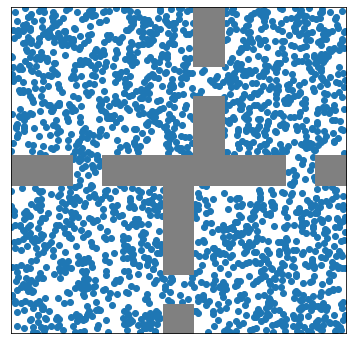

In [24]:
plt.figure(figsize=(6, 6))
plt.scatter(*rb_vec.T)
plot_walls(eval_tf_env.pyenv.envs[0].env.walls)
plt.show()

# Calculate qvalue distances

In [57]:
pdist = agent._get_pairwise_dist(rb_vec, aggregate=None).numpy()

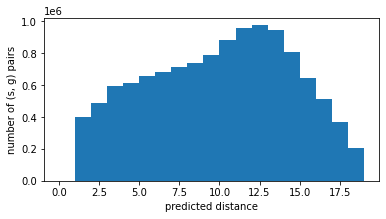

In [30]:
plt.figure(figsize=(6, 3))
plt.hist(pdist.flatten(), bins=range(20))
plt.xlabel('predicted distance')
plt.ylabel('number of (s, g) pairs')
plt.show()

# Tune edge cutoff

Plotting 1880 nodes and 125853 edges


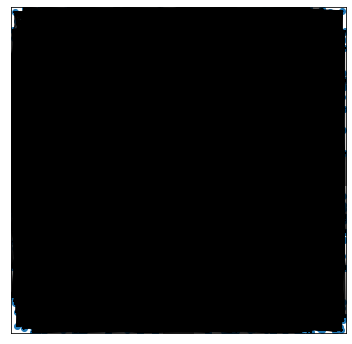

In [25]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

from sgm.utils.visualization import *
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 1880 nodes and 1880 edges


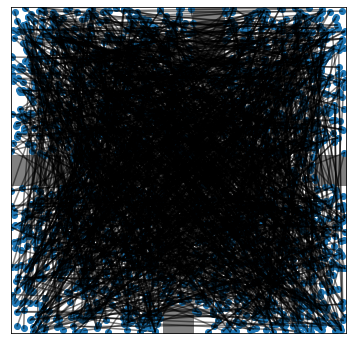

In [31]:
search_policy.keep_k_nearest(5)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 234 nodes and 883 edges


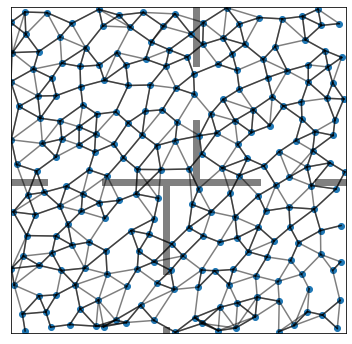

In [19]:
search_policy.keep_k_nearest(4)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 234 nodes and 680 edges


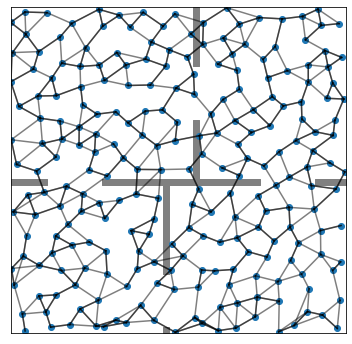

In [20]:
search_policy.keep_k_nearest(3)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 1880 nodes and 1880 edges


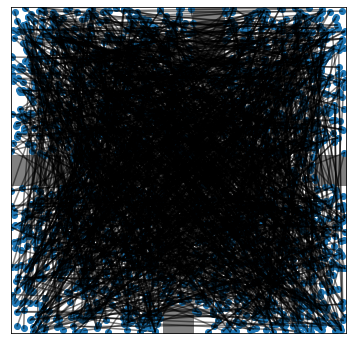

In [32]:
search_policy.keep_k_nearest(2)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

Plotting 1880 nodes and 1880 edges


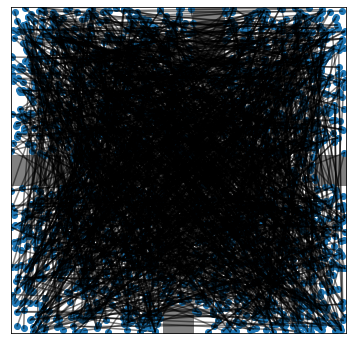

In [28]:
search_policy.keep_k_nearest(1)
plot_graph(search_policy._g.copy(), search_policy.rb_vec, eval_tf_env)

# Calculate Euclidean distances

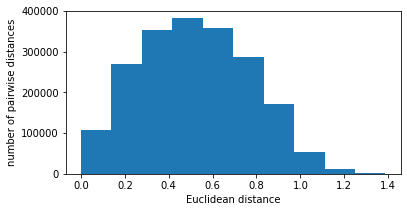

In [23]:
from scipy.spatial import distance
euclidean_dists = distance.pdist(rb_vec)

plt.figure(figsize=(6, 3))
plt.hist(euclidean_dists.flatten())
plt.xlabel('Euclidean distance')
plt.ylabel('number of pairwise distances')
plt.show()

# Initialize SGM search policy

In [66]:
from sgm.planner import SGMSearchPolicy
search_policy_type = "SGM"
agent.initialize_search(rb_vec, max_search_steps=10) # needed to set agent attributes that SGMSearchPolicy constructor queries
search_policy = SGMSearchPolicy(agent, pdist, rb_vec, rb_vec, cache_pdist = True)
agent.initialize_search(search_policy.rb_vec, max_search_steps=10)

# Cleanup and evaluate SGM

In [ ]:
from sgm.evaluation import cleanup_and_eval

logdir = os.path.join(os.getcwd(), os.pardir, "logs")
eval_difficulty = 0.95
k_nearest = 5
eval_trials = 20
total_cleanup_steps = 10000
eval_period = 2000

logfolder = cleanup_and_eval(search_policy,
                             search_policy_type,
                             desc_name,
                             eval_tf_env,
                             logdir,
                             eval_difficulty=eval_difficulty,
                             k_nearest=k_nearest,
                             eval_trials=eval_trials,
                             total_cleanup_steps=total_cleanup_steps,
                             eval_period=eval_period)

SGM has initial success rate 0.00
Evaluated initial SGM success rate in 2589.28 seconds


# Evaluate clean-up  time

In [17]:
from sgm.evaluation import take_cleanup_steps
print(take_cleanup_steps(search_policy, tf_env, 5000, search_policy_type))

390.078125


# Load cleanup graphs

In [ ]:
from sgm.utils.visualization import *

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_initial"))
initial_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_0_cleanup_steps/"))
filtered_graph = search_policy._g.copy()

search_policy.load(os.path.join(logfolder, search_policy_type.lower().replace(" ", "_") + "_filtered_{}_cleanup_steps/".format(total_cleanup_steps)))
cleaned_graph = search_policy._g.copy()

pruned_graph = nx.difference(filtered_graph, cleaned_graph)

# Visualize cleanup graphs

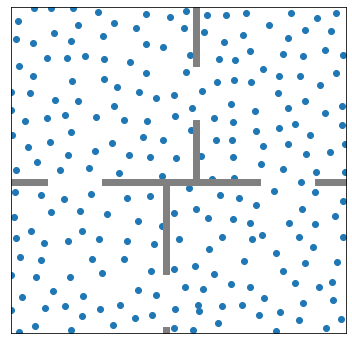

In [25]:
plot_points(search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 2330 edges


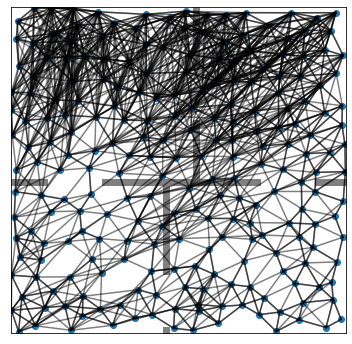

In [26]:
plot_graph(initial_graph, search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 1121 edges


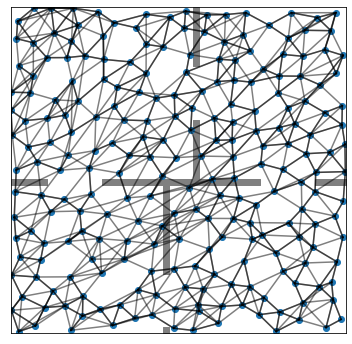

In [27]:
plot_graph(filtered_graph, search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 1115 edges


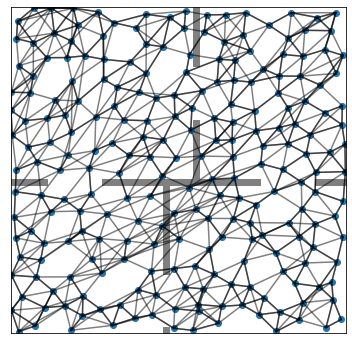

In [28]:
plot_graph(cleaned_graph, search_policy.rb_vec, eval_tf_env)

Plotting 229 nodes and 6 edges


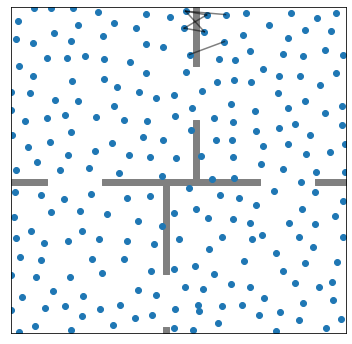

In [29]:
plot_graph(pruned_graph, search_policy.rb_vec, eval_tf_env)